## Problem 1: Clustering

* A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.
* 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

* 1.2  Do you think scaling is necessary for clustering in this case? Justify

* 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

* 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

* 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

* Dataset for Problem 1: bank_marketing_part1_Data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [2]:
df_clust = pd.read_csv("C:\\Users\\archy\\Downloads\\Data_Mining\\bank_marketing_part1_Data-1.csv")

In [3]:
df_clust.head()

,Unnamed: 0,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df_clust.describe()

,Unnamed: 0,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,0.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,52.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,104.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,156.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,209.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


* Mean and standard deviation in few cases is less than one. 
* 


In [5]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    210 non-null    int64  
 1   spending                      210 non-null    float64
 2   advance_payments              210 non-null    float64
 3   probability_of_full_payment   210 non-null    float64
 4   current_balance               210 non-null    float64
 5   credit_limit                  210 non-null    float64
 6   min_payment_amt               210 non-null    float64
 7   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [6]:
df_clust = df_clust.drop(["Unnamed: 0"],axis = 1)
df_clust.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [7]:
df_clust['spending'] = df_clust['spending'].multiply(1000)
df_clust['advance_payments'] = df_clust['advance_payments'].multiply(100)
df_clust['current_balance'] = df_clust['current_balance'].multiply(1000)
df_clust['credit_limit'] = df_clust['credit_limit'].multiply(10000)
df_clust['min_payment_amt'] = df_clust['min_payment_amt'].multiply(100)
df_clust['max_spent_in_single_shopping'] = df_clust['max_spent_in_single_shopping'].multiply(1000)

df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


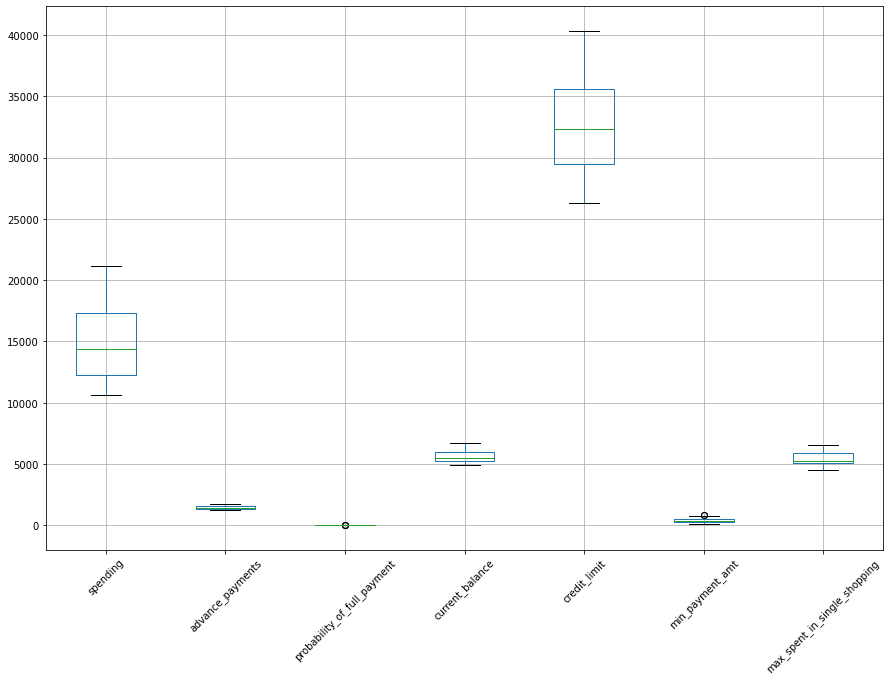

In [8]:
df_clust.boxplot(figsize=(15,10), rot=45);


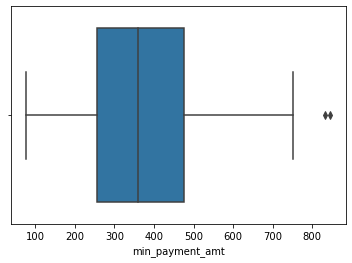

In [9]:
sns.boxplot(x=df_clust['min_payment_amt'])   # box plot

In [10]:
df_clust.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [11]:
df_clust.shape

(210, 7)

### 1.2 Do you think scaling is necessary for clustering in this case? Justify

* We wiin need to scale the data as the some values are very much different than others. for example "probability_of_full_payment" and "Spending" are very much apart from each other. 
* Data scaling will bring these value compairable to each other.
* Another reason we need to scale the data is - there are certain values which are in 100's some values in 1000's and some values in 10000's.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X = StandardScaler()

In [14]:
scaled_clust = X.fit_transform(df_clust)

In [15]:
scaled_clust

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [16]:
# create a dataframe for the purpose of clustring.
scaled_clust = pd.DataFrame(scaled_clust, index=df_clust.index, columns=df_clust.columns)
scaled_clust.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274
6,-0.974080,-0.943539,-0.878059,-0.630155,-1.190520,0.380540,-0.204099
7,-0.381541,-0.390903,0.144293,-0.331518,-0.383756,-0.512143,-1.189192
8,1.144591,1.305384,-0.309615,1.453520,0.672468,-0.564811,1.764048
9,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156


###  1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [18]:
wardlink = linkage(scaled_clust, method = 'ward')

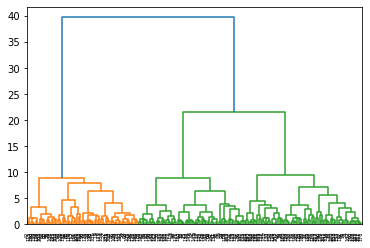

In [19]:
dend = dendrogram(wardlink)

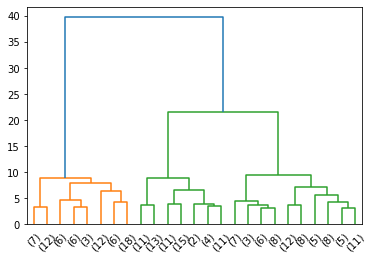

In [20]:
dend = dendrogram(wardlink,
                 truncate_mode = 'lastp',
                 p = 25,
                 )

In [21]:
cluster_1 = fcluster(wardlink,2,criterion = "maxclust")
cluster_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [22]:
cluster_2 = fcluster(wardlink, 25, criterion = "distance")
cluster_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [23]:
np.array_equal(cluster_1,cluster_2)


True

In [24]:
df_clust['Cluster_H'] = cluster_1

In [25]:
#df_clust.to_csv('Cluster_H.csv')
#df_clust.to_csv("C:\\Users\\archy\\Downloads\\Data_Mining\\bank_marketing_part1_Data-2.csv")

In [26]:
df_clust.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_H
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1
5,12700.0,1341.0,0.8874,5183.0,30910.0,845.6,5000.0,2
6,12020.0,1333.0,0.8503,5350.0,28100.0,427.1,5308.0,2
7,13740.0,1405.0,0.8744,5482.0,31140.0,293.2,4825.0,2
8,18170.0,1626.0,0.8637,6271.0,35120.0,285.3,6273.0,1
9,11230.0,1288.0,0.8511,5140.0,27950.0,432.5,5003.0,2


### Description
* in the above code, the cluster with two different criterion are same therefore we can select any one cluster and add it the original dataset. 
* When we see the dataset we can see that first row third row comes under cluster one where as second row is under cluster three and fourth row under cluster two. 


### Description about the clusters.
* best customer - cluster one inclues the best customres, and there arearound 70 in that cluster. thye are good in everything, like paying in advance, their current balances are higher, their dmin payment amount are not too low, and the spent max in single shopping.
* Avg Customer - There are 67 customers in this cluster. These customer are poor in almost everthing, like their current balance is very low, but their min payment amount and max spent in single shopping is better than third level customer. 
* better customre - There are 73 customers in this cluster, and they are all better in most of the aspects then avg customer, only that they are poor in min payment amt. their credit limit is average, their advance payment is better thatn second level cusomer. Their max spent in sinle shopping is lowest then the custerms in other two cluster.

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [27]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_clust)
k_means2.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [28]:
k_means2 = KMeans(n_clusters = 3,random_state=1)
k_means2.fit(scaled_clust)
k_means2.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [29]:
wss =[] 

In [30]:
for i in range(1,10):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_clust)
    wss.append(KM.inertia_)

In [31]:
wss

[1469.9999999999993,
 659.171754487041,
 430.6589731513006,
 371.385090608011,
 327.2127816566133,
 289.31599538959495,
 262.98186570162267,
 241.81894656086024,
 223.91254221002723]

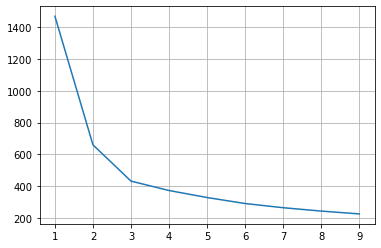

In [32]:
plt.plot(range(1,10), wss)
plt.grid()
plt.show()


 * We can stop at the thrid cluster and it can be our optimum cluster number as there is no major drop after third cluster.

* Cluster evaluation for 3 clusters.

In [33]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_clust)
labels1 = k_means.labels_
labels1

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [34]:
silhouette_score(scaled_clust,labels1)


0.4007270552751299

* Cluster evaluation for 4 clusters

In [35]:
k_means = KMeans(n_clusters = 4, random_state = 1)
k_means.fit(scaled_clust)
labels2 = k_means.labels_
labels2

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

In [36]:
silhouette_score(scaled_clust,labels2)


0.3276547677266193

In [37]:
df_clust["clust_kmeans"] = labels1
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_H,clust_kmeans
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1,2
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2,0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1,2
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2,1
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1,2


In [38]:
silhouette_samples(scaled_clust,labels1).min()

0.002713089347678845

In [39]:
sil_width = silhouette_samples(scaled_clust, labels1)


In [40]:
df_clust["sil_width"] = sil_width
df_clust.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_H,clust_kmeans,sil_width
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1,2,0.573699
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2,0,0.366386
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1,2,0.637784
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2,1,0.512458
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1,2,0.362276
5,12700.0,1341.0,0.8874,5183.0,30910.0,845.6,5000.0,2,1,0.218446
6,12020.0,1333.0,0.8503,5350.0,28100.0,427.1,5308.0,2,1,0.472867
7,13740.0,1405.0,0.8744,5482.0,31140.0,293.2,4825.0,2,0,0.361812
8,18170.0,1626.0,0.8637,6271.0,35120.0,285.3,6273.0,1,2,0.520285
9,11230.0,1288.0,0.8511,5140.0,27950.0,432.5,5003.0,2,1,0.532517


* Silhouette sample is a positive value that means there is no record which is wrongly mapped in the dataset under silhoutte sample.
* We have added one new feature to oour data that is sil_width. 

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.


In [41]:
df_clust.clust_kmeans.value_counts().sort_index()

0    71
1    72
2    67
Name: clust_kmeans, dtype: int64

In [42]:
cluster_profile = df_clust.iloc[:,1:10].groupby("clust_kmeans").mean()
cluster_profile["Freq"]=df_clust.clust_kmeans.value_counts()
cluster_profile=cluster_profile.drop(["Cluster_H"], axis = 1)
cluster_profile

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Freq
clust_kmeans,,,,,,,,
0,1433.774648,0.881597,5514.577465,32592.253521,270.734085,5120.802817,0.339816,71
1,1324.777778,0.848253,5231.750000,28495.416667,474.238889,5101.722222,0.397473,72
2,1620.343284,0.884210,6175.686567,36975.373134,363.237313,6041.701493,0.468772,67


#### Description:-
* Cluster 2 has the best values in all the prameters except min_payment_amt 

## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

* 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.
* 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
* 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model
* 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.
* 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [43]:
df_prob2 = pd.read_csv("C:\\Users\\archy\\Downloads\\Data_Mining\\insurance_part2_data-2.csv")

In [44]:
df_prob2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [45]:
df_prob2.describe(include ='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [46]:
df_prob2.nunique()

Age              70
Agency_Code       4
Type              2
Claimed           2
Commision       324
Channel           2
Duration        257
Sales           380
Product Name      5
Destination       3
dtype: int64

In [47]:
df_prob2.Duration.value_counts().sort_values(ascending = False)

8       83
5       82
6       81
10      81
11      81
        ..
217      1
215      1
141      1
149      1
4580     1
Name: Duration, Length: 257, dtype: int64

In [48]:
df_prob2.Duration = df_prob2.Duration.replace(-1,8)

In [49]:
df_prob2["Duration"].value_counts().sort_values(ascending = False)

8      84
5      82
6      81
10     81
11     81
       ..
223     1
217     1
215     1
141     1
466     1
Name: Duration, Length: 256, dtype: int64

In [50]:
for column in df_prob2[['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration', 
                   'Sales', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df_prob2[column].nunique())
    print(df_prob2[column].value_counts().sort_values())
    print('\n')

AGE :  70
8       1
14      1
83      1
77      1
84      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


COMMISION :  324
126.75       1
12.45        1
46.80        1
21.35        1
17.55        1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


DURATION :  256
466     1
141     1
215     1
217     1
223     1
       ..
11     81
10     81
6      81
5      82
8      84
Name: Duration, Length: 256, dtype: int64


SALES :  380
271.00      1
62.40       1
491.50      1
159.00      1
100.50      1
         ... 
216.00     59
252.85     60
22.00      79
10.00     163
20.00     225
Name: Sales, Length: 38

In [51]:
df_prob2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [52]:
df_prob2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [53]:
df_prob2.shape

(3000, 10)

In [54]:
Dupes = df_prob2.duplicated()
sum(Dupes)
df_prob2[Dupes]


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [55]:
df_prob2.drop_duplicates(inplace=True) 


In [56]:
Dupes = df_prob2.duplicated()
sum(Dupes)
df_prob2[Dupes]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [57]:
df_prob2.shape

(2861, 10)

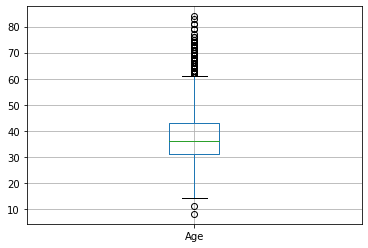

In [58]:
df_prob2.boxplot(column=['Age'])
plt.show()

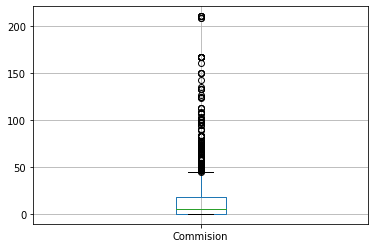

In [59]:
df_prob2.boxplot(column=['Commision'])
plt.show()

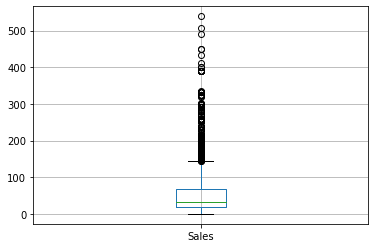

In [60]:
df_prob2.boxplot(column=['Sales'])
plt.show()

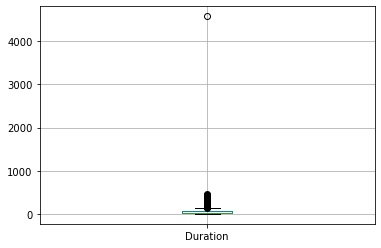

In [61]:
df_prob2.boxplot(column = ['Duration'])
plt.show()

#####  Getting all the counts in Object

In [62]:
print('Agency_Code \n',df_prob2.Agency_Code.value_counts())
print('\n')
print('Type \n',df_prob2.Type.value_counts())
print('\n')
print('Claimed \n',df_prob2.Claimed.value_counts())
print('\n')
print('Channel \n',df_prob2.Channel.value_counts())
print('\n')
#print('Product_Name \n',df_prob2.Product_Name.value_counts())
#print('\n')
print('Destination \n',df_prob2.Destination.value_counts())
print('\n')

Agency_Code 
 EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64


Claimed 
 No     1947
Yes     914
Name: Claimed, dtype: int64


Channel 
 Online     2815
Offline      46
Name: Channel, dtype: int64


Destination 
 ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64




In [63]:
for feature in df_prob2.columns: 
    if df_prob2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_prob2[feature].unique()))
        print(pd.Categorical(df_prob2[feature].unique()).codes)
        df_prob2[feature] = pd.Categorical(df_prob2[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [64]:
print('Agency_Code \n',df_prob2.Agency_Code.value_counts())
print('\n')
print('Type \n',df_prob2.Type.value_counts())
print('\n')
print('Claimed \n',df_prob2.Claimed.value_counts())
print('\n')
print('Channel \n',df_prob2.Channel.value_counts())
print('\n')
#print('Product Name \n',df_prob2.Product Name.value_counts())
#print('\n')
print('Destination \n',df_prob2.Destination.value_counts())
print('\n')

Agency_Code 
 2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1709
0    1152
Name: Type, dtype: int64


Claimed 
 0    1947
1     914
Name: Claimed, dtype: int64


Channel 
 1    2815
0      46
Name: Channel, dtype: int64


Destination 
 0    2327
1     319
2     215
Name: Destination, dtype: int64




In [65]:
df_prob2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [66]:
df_prob2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [67]:
df_prob2.shape

(2861, 10)

In [68]:
df_prob2.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

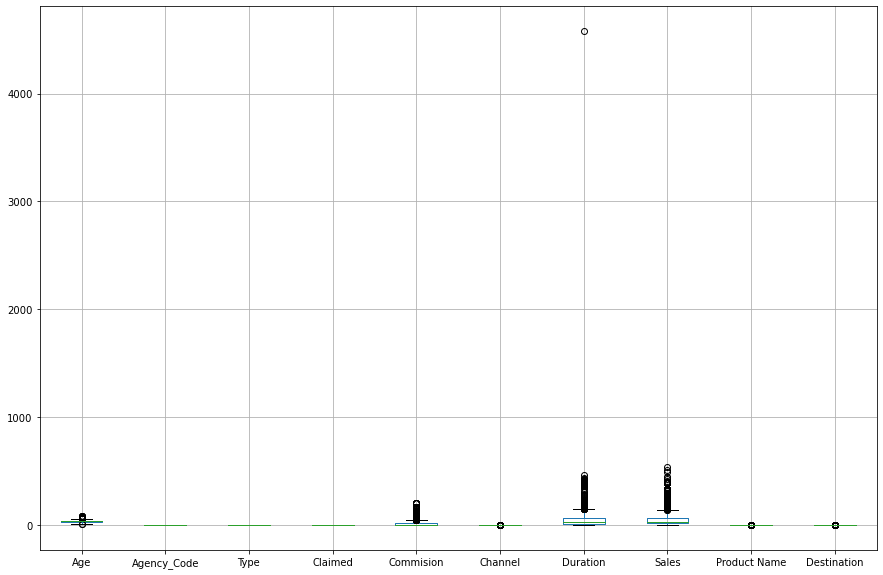

In [69]:
df_prob2.boxplot(figsize = (15,10))

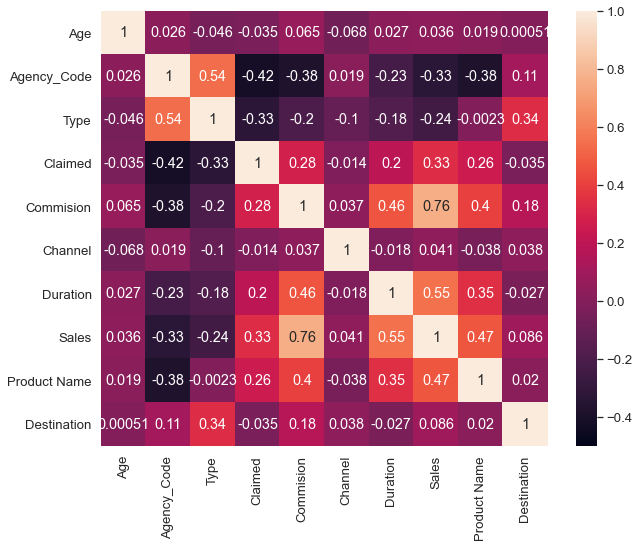

In [70]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_prob2.corr(), annot=True,vmin=-0.5,vmax=1)

###  2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

#### *** Combining both the questions and buling all models together and performance Metrics.

In [71]:
X1 = df_prob2.drop(["Claimed"], axis=1)

Y1 = df_prob2.pop("Claimed")


In [72]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=.30, random_state=1)


In [73]:
Y1_train.value_counts(normalize = True)

0    0.678821
1    0.321179
Name: Claimed, dtype: float64

In [74]:
Y1_test.value_counts(normalize = True)

0    0.684517
1    0.315483
Name: Claimed, dtype: float64

In [75]:
print('X1_train',X1_train.shape)
print('X1_test',X1_test.shape)
print('Y1_train',Y1_train.shape)
print('Y1_test',Y1_test.shape)

X_train (2002, 9)
X_test (859, 9)
Y_train (2002,)
Y_test (859,)


## Cart Model

In [76]:
cart_model1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [77]:
cart_model1.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [78]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(cart_model1, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [79]:
#Variable importance
print (pd.DataFrame(cart_model1.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.280493
Sales         0.229321
Age           0.187876
Agency_Code   0.168711
Commision     0.072804
Product Name  0.028635
Destination   0.028253
Channel       0.003908
Type          0.000000


In [80]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3,6,9], #20,30,50
    'min_samples_leaf': [15,30, 45], #100,150
    'min_samples_split': [100,200, 300,400], #150,300
    'random_state' :[1]
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [81]:
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
best_grid_cart = grid_search.best_estimator_
best_grid_cart

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 45, 'min_samples_split': 200, 'random_state': 1}


DecisionTreeClassifier(max_depth=6, min_samples_leaf=45, min_samples_split=200,
                       random_state=1)

In [82]:
y_predict = cart_model1.predict(X_test)

In [83]:
y_predict.shape

(859,)

In [84]:
reg_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_cart_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

In [85]:
credit_tree_regularized = open('reg_Tree_cart.dot','w')
dot_data = tree.export_graphviz(reg_cart_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

In [86]:
print (pd.DataFrame(reg_cart_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.510097
Sales         0.289674
Duration      0.069423
Commision     0.045978
Product Name  0.040231
Age           0.027745
Destination   0.016854
Type          0.000000
Channel       0.000000


In [87]:
# predicting on trainig and test dataset for CART
ytrain_predict_cart = best_grid_cart.predict(X_train)
ytest_predict_cart = best_grid_cart.predict(X_test)

In [88]:
#Classes dataframe for cart
ytest_predict_cart
ytest_predict_prob_cart=best_grid_cart.predict_proba(X_test)
ytest_predict_prob_cart
pd.DataFrame(ytest_predict_prob_cart).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.274112,0.725888
3,0.837500,0.162500
4,0.837500,0.162500


AUC: 0.818


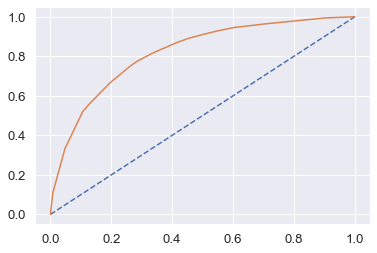

In [89]:
probs_cart = best_grid_cart.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
cart_train_auc = roc_auc_score(Y_train, probs_cart)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.792


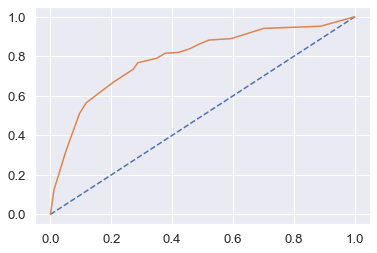

In [90]:
probs_cart = best_grid_cart.predict_proba(X_test)
probs_cart = probs_cart[:, 1]
cart_test_auc = roc_auc_score(Y_test, probs_cart)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(Y_test, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

In [91]:
#Confusion matrix on training data
confusion_matrix(Y_train, ytrain_predict_cart)

array([[1215,  144],
       [ 309,  334]], dtype=int64)

In [92]:
#Train Data Accuracy on CART
cart_train_acc=best_grid_cart.score(X_train,Y_train) 
cart_train_acc

0.7737262737262737

In [93]:
#Calssification report on train lable on Cart model
print(classification_report(Y_train, ytrain_predict_cart))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.70      0.52      0.60       643

    accuracy                           0.77      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.77      0.76      2002



In [94]:
cart_metrics=classification_report(Y_train, ytrain_predict_cart,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.52
cart_train_f1  0.6


In [95]:
confusion_matrix(Y_test, ytest_predict_cart)

array([[532,  56],
       [133, 138]], dtype=int64)

y_predicted_newcart1 = reg_cart_model.predict_proba(X_test)[:,1]>.1
print(confusion_matrix(Y_test,y_predicted_newcart1))
cm1 = confusion_matrix(Y_test,y_predicted_newcart1)
print('\n')

In [96]:
#Test Data Accuracy
cart_test_acc=best_grid_cart.score(X_test,Y_test)
cart_test_acc

0.779976717112922

In [97]:
print(classification_report(Y_test, ytest_predict_cart))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.71      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.76      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



In [98]:
cart_metrics=classification_report(Y_test, ytest_predict_cart,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.51
cart_test_f1  0.59


from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
dec_tree = plot_tree(decision_tree = reg_cart_model, 
                     feature_names =list(X_train), 
                     class_names = list(train_char_label), 
                     filled = True, precision =4, rounded = True)

## Random Forest model

In [99]:
from sklearn.model_selection import GridSearchCV
rfcl=RandomForestClassifier(random_state=1)
#import warnings
#warnings.filterwarnings("ignore")

In [100]:
#rfcl.fit(X_train,Y_train)


In [101]:
param_grid = {
    'max_depth': [10,20],
    'max_features': [6,9],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [20,30],
    'n_estimators': [300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [102]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'max_features': [6, 9],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [20, 30], 'n_estimators': [300]})

In [103]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 300}

In [104]:
best_grid_RF = grid_search.best_estimator_

In [105]:
best_grid_RF

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=20, n_estimators=300)

In [106]:
#RF model prediction
ytrain_predict_RF = best_grid_RF.predict(X_train)
ytest_predict_RF = best_grid_RF.predict(X_test)

In [107]:
#Classes dataframe for RF
ytest_predict_RF
ytest_predict_prob_RF=best_grid_RF.predict_proba(X_test)
ytest_predict_prob_RF
pd.DataFrame(ytest_predict_prob_RF).head()

,0,1
0,0.424366,0.575634
1,0.916682,0.083318
2,0.381187,0.618813
3,0.860510,0.139490
4,0.741800,0.258200


In [108]:
#performance evaluation for RF
confusion_matrix(Y_train,ytrain_predict_RF)

array([[1234,  125],
       [ 221,  422]], dtype=int64)

In [109]:
rf_train_acc=best_grid_RF.score(X_train,Y_train) 
rf_train_acc

0.8271728271728271

In [110]:
#Classification report for RF
print(classification_report(Y_train,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1359
           1       0.77      0.66      0.71       643

    accuracy                           0.83      2002
   macro avg       0.81      0.78      0.79      2002
weighted avg       0.82      0.83      0.82      2002



Area under Curve is 0.7821596018479419


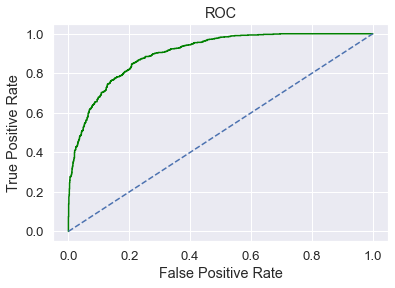

In [111]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_train,best_grid_RF.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(Y_train,best_grid_RF.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [112]:
rf_metrics=classification_report(Y_train, ytrain_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.77
rf_train_recall  0.66
rf_train_f1  0.71


In [113]:
#confusion matrix on test data on RF
confusion_matrix(Y_test,ytest_predict_RF)

array([[517,  71],
       [118, 153]], dtype=int64)

In [114]:
rf_test_acc=best_grid_RF.score(X_test,Y_test)
rf_test_acc

0.779976717112922

y_predicted_newtest1 = reg_cart_model.predict_proba(X_test)[:,1]>.1
print(confusion_matrix(Y_test,y_predicted_newtest1))
cm1 = confusion_matrix(Y_test,y_predicted_newtest1)
print('\n')

In [115]:
# Classification report on RF
print(classification_report(Y_test,ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       588
           1       0.68      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



Area under Curve is 0.7219136732183649


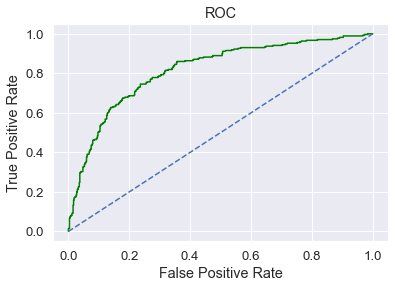

In [116]:
rf_test_fpr, rf_test_tpr,_=roc_curve(Y_test,best_grid_RF.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(Y_test,best_grid_RF.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [117]:
rf_metrics=classification_report(Y_test, ytest_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.56
rf_test_f1  0.62


In [118]:
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.258136
Sales         0.214380
Product Name  0.152150
Duration      0.138183
Age           0.103939
Commision     0.102360
Destination   0.017413
Type          0.009926
Channel       0.003514


## Artificial neural Network model

In [119]:
#treating outliers just before ANN
#Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [120]:
for feature in df_prob2[[ 'Commision', 'Sales', 'Duration']]: 
    lr,ur=treat_outlier(df_prob2[feature])
    df_prob2[feature]=np.where(df_prob2[feature]>ur,ur,df_prob2[feature])
    df_prob2[feature]=np.where(df_prob2[feature]<lr,lr,df_prob2[feature])

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc = StandardScaler()

In [123]:
#Scale the training data
X_train = sc.fit_transform(X_train)

In [124]:
X_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [125]:
X_test = sc.transform(X_test)

In [126]:
X_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [127]:
param_grid = {
    'hidden_layer_sizes': [15,25,50], #,50,200
    'max_iter': [500,1000], #5000,2500
    'solver': ['adam'], #adam
    'tol': [0.001],
    'random_state':[10]
}

nncl = MLPClassifier()

grid_search_ann = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [128]:
grid_search_ann.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [15, 25, 50],
                         'max_iter': [500, 1000], 'random_state': [10],
                         'solver': ['adam'], 'tol': [0.001]})

In [129]:
best_grid_ann = grid_search_ann.best_estimator_
best_grid_ann

MLPClassifier(hidden_layer_sizes=15, max_iter=500, random_state=10, tol=0.001)

In [130]:
# ANN model predictions
ytrain_predict_ann = best_grid_ann.predict(X_train)
ytest_predict_ann = best_grid_ann.predict(X_test)

In [131]:
#Classes dataframe for cart
ytest_predict_ann
ytest_predict_prob_ann=best_grid_ann.predict_proba(X_test)
ytest_predict_prob_ann
pd.DataFrame(ytest_predict_prob_ann).head()

,0,1
0,0.256115,0.743885
1,0.883449,0.116551
2,0.419130,0.580870
3,0.651408,0.348592
4,0.663593,0.336407


In [132]:
confusion_matrix(Y_train,ytrain_predict_ann)

array([[1220,  139],
       [ 345,  298]], dtype=int64)

In [133]:
train_acc_ann=best_grid_ann.score(X_train,Y_train) 
train_acc_ann

0.7582417582417582

In [134]:
print(classification_report(Y_train,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1359
           1       0.68      0.46      0.55       643

    accuracy                           0.76      2002
   macro avg       0.73      0.68      0.69      2002
weighted avg       0.75      0.76      0.74      2002



Area under Curve is 0.6805857385301836


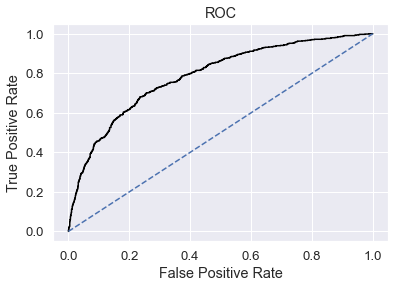

In [135]:
nn_train_fpr, nn_train_tpr,_=roc_curve(Y_train,best_grid_ann.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(Y_train,best_grid_ann.predict(X_train))
print('Area under Curve is', nn_train_auc)

In [136]:
ann_metrics=classification_report(Y_train, ytrain_predict_ann,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.68
ann_train_recall  0.46
ann_train_f1  0.55


In [137]:
#Evaluation for test data
confusion_matrix(Y_test,ytest_predict_ann)

array([[534,  54],
       [150, 121]], dtype=int64)

In [138]:
nn_test_acc=best_grid_ann.score(X_test,Y_test)
nn_test_acc

0.7625145518044237

In [139]:
print(classification_report(Y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       588
           1       0.69      0.45      0.54       271

    accuracy                           0.76       859
   macro avg       0.74      0.68      0.69       859
weighted avg       0.75      0.76      0.75       859



Area under Curve is 0.6773288651253859


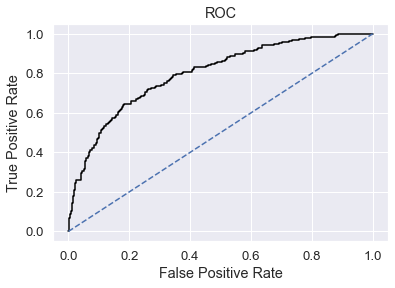

In [140]:
nn_test_fpr, nn_test_tpr,_=roc_curve(Y_test,best_grid_ann.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(Y_test,best_grid_ann.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [141]:
ann_metrics=classification_report(Y_test, ytest_predict_ann,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_precision  0.69
ann_test_recall  0.45
ann_test_f1  0.54


In [142]:
# Variable Importance in ANN
#print (pd.DataFrame(best_grid_ann.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

In [143]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[train_acc_ann,nn_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.78,0.83,0.78,0.76,0.76
AUC,0.82,0.79,0.78,0.72,0.68,0.68
Recall,0.52,0.51,0.66,0.56,0.46,0.45
Precision,0.70,0.71,0.77,0.68,0.68,0.69
F1 Score,0.60,0.59,0.71,0.62,0.55,0.54


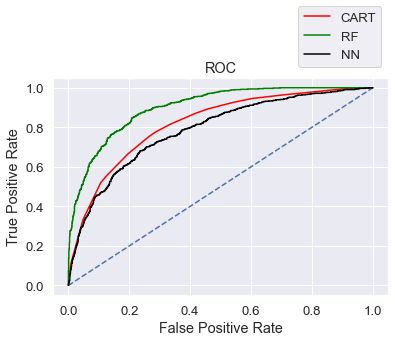

In [144]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

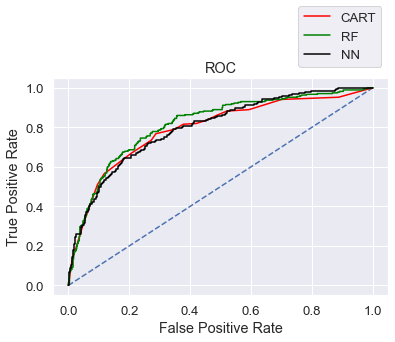

In [145]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')